<a href="https://colab.research.google.com/github/PUC-Infovis/syllabus-2019/blob/master/ayudantias/ayudantia00/parte2_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ayudantía 00 || Parte 2: Gráficos en [Matplotlib](https://matplotlib.org/) y [Altair](https://altair-viz.github.io/)**

### Por Ricardo Schilling
---

En jupyter, existen varias maneras distintas de **plotear** nuestros datos, en esta ayudantía nos centraremos en el uso de la [librería altair](https://altair-viz.github.io/index.html). Sin embargo, también veremos un poco de [matplotlib](https://matplotlib.org/)

## 1. Matplotlib
Esta librería nos permite hacer ploteo básico de datos, los cuales pueden estar las en estructuras de datos que queramos, sin embargo, nos centraremos en datos que tengan forma de **pandas DataFrame** por simplicidad.

Para nuestros ejemplos, usaremos los datos de una librería llamada [scikit-learn](http://scikit-learn.org/stable/index.html)

Para instalar estas librerías, deben correr los comandos
```bash
pip install numpy scipy matplotlib
pip install -U scikit-learn
```

Esto también instalará librarías útiles como [numpy](http://www.numpy.org/) y [SciPy](https://www.scipy.org/) en su computador.

Empezaremos importando las librerías utilizadas

In [0]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd

Ahora cargaremos los datos del dataset **iris** de scikit-learn, el cual toma las mediciones de 150 flores, resgitrando el largo y ancho de los sépalos y los pétalos de lirios (o irises) y el típo de flor (Setosa, Virginica o Versicolor)

In [0]:
# Cargar dataset de iris
dataset = datasets.load_iris()

# Definir las columnas que queremos en el DataFrame
features = ['s_length', 's_width', 'p_length', 'p_width'] 

# Cargar Dataframe con la información del dataset y las columnas anteriormente definidas
iris = pd.DataFrame(dataset['data'], columns=features)

# El comando head es para ver solo las primeras 10 filas
iris.head(10)

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Ahora vamos a agregar 2 columnas más, una diga el número de la clase y otro que le ponga el nombre de la clase según el número. Esto es porque el dataset define cada clase como:
* 0 = setosa
* 1 = versicolor
* 2 = virginica

In [0]:
"""
labmbda es una forma de crear una función en la misma línea
En este caso estamos diciendo que recibe un "x" y retorna dataset['target_names'][x]
Es similar a decir 

def function(x):
    return dataset['target_names'][x]
    
Luego, map es una función propia de python que se encarga de aplicar una función a cada elemento de una lista
En este caso, la lista de target corresponde al número de la clase de cada planta ([0,0,1,1,2,...,1])
y con el lambda estamos indicando que para cada número retornar el nombre asociado
"""
tipo = list(map(lambda x: dataset['target_names'][x], list(dataset['target'])))

# Luego indicamos que la columna tipo será esta lista recien construida con el nombre de la clase
iris['tipo'] = pd.Series(tipo)

# Indicamos que tipo_num será la lista con el número de clase
iris['tipo_num'] = pd.Series(dataset['target'])

# Vemos las primeras 10 filas
iris.head(10)

,s_length,s_width,p_length,p_width,tipo,tipo_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


Ahora que disponemos de datos, podemos plotearlos.

Un simple **scatterplot** donde ploteamos el largo de los sépalos (eje X) versus el ancho de estos (eje Y), además agregaremos color dependiendo del tipo de flor.

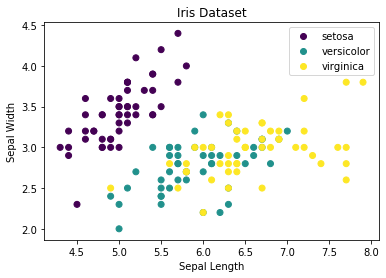

In [0]:
# Ploteamos los datos en un scatterplot
scatter = plt.scatter(iris['s_length'], iris['s_width'], c=iris['tipo_num'])

# con legend_elements()[0] obtenemos la lista de diferentes tipos
# de puntos utilizados en el scatterploot
points = scatter.legend_elements()[0]

# Agregamos la legenda, indicando que para cada punto, existe un label asociado
plt.legend(points, ["setosa", "versicolor", "virginica"])

plt.xlabel('Sepal Length') # Cambiamos el nombre del eje X
plt.ylabel('Sepal Width') # Cambiamos el nombre del eje Y
plt.title('Iris Dataset') # Cambiamos el nombre del gráfico
plt.show() # Mostramos el gráfico

En matplotlib también hay otros tipos de gráficos, como barplots.

En el siguiente ejemplo usaremos un barplot para graficar las estadísticas medias de los 3 tipos de flores

In [0]:
means = iris.groupby('tipo').sum()/50
sl = tuple(means['s_length'])
sw = tuple(means['s_width'])
pl = tuple(means['p_length'])
pw = tuple(means['p_width'])

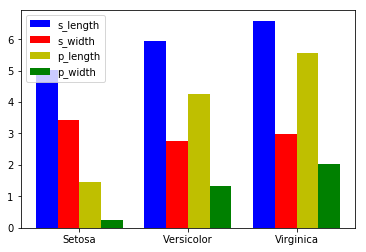

In [0]:
fig, ax = plt.subplots() # Creo subplots

index = np.arange(3) # Creo un array de 0 a 2, esto es para poner los nombres a cada tipo de flor

bar_width = 0.2  # Ancho de barra, si es muy grande pueden superponerse

rects1 = ax.bar(index, sl, bar_width,
                color='b', label='s_length')  # Primera barra

rects2 = ax.bar(index + bar_width, sw, bar_width,
                color='r', label='s_width')

rects3 = ax.bar(index + 2 * bar_width, pl, bar_width,
                color='y', label='p_length')

rects4 = ax.bar(index + 3 * bar_width, pw, bar_width,
                color='g', label='p_width')

ax.set_xticks(index + 3 * bar_width / 2)
ax.set_xticklabels(('Setosa', 'Versicolor', 'Virginica'))
ax.legend(loc=0)  # Poner la leyenda de colores en la mejor posición
plt.show()

## 2. Altair
Altair es una librería de ploteo que ofrece muy buenas funcionalidades, como interactividad, gráficos mas bonitos y facilidad para explortar gráficos a imágenes.
Para correr altair en un jupyter notebook, son necesarias dependencias extras.
```bash
pip install -U altair vega_datasets notebook vega
```
(Si ya tienes jupyter notebook abierto, deberás cerrarlo completamente y volver a abrirlo para que resulte)

Además de esto, es necesario permitir que altair renderize, para esto **siempre** debemos ingresar
```python
alt.renderers.enable('notebook')
```

Si, a pesar de hacer todo esto, jupyter sigue sin funcionar, puedes usar esta librería en conjunto con [Google Colaboratory](https://colab.research.google.com/), en el que deberás poner 
```python
alt.renderers.enable('colab')
```
como el renderizador.

Para los siguientes ejemplos usaremos el mismo dataset, sin embargo esta vez lo importaremos de **vega_datasets** (el resultado es el mismo DataFrame anterior, sin emabrgo este viene automático)

In [0]:
import altair as alt
from vega_datasets import data

# Para notebooks
alt.renderers.enable('colab')
print()

In [0]:
iris = data.iris()

alt.Chart(iris).mark_point().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)), 
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    # Estas opciones son para que el gráfico empiece mas cerca de los datos
    # x='petalLength',
    # y='petalWidth',
    # Estas opciones tambien funcionan, pero no se ven tan bien
    color='species'
)

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  2            1.3         0.2          4.7         3.2     setosa
  3            1.5         0.2          4.6         3.1     setosa
  4            1.4         0.2          5.0         3.6     setosa
  5            1.7         0.4          5.4         3.9     setosa
  6            1.4         0.3          4.6         3.4     setosa
  7            1.5         0.2          5.0         3.4     setosa
  8            1.4         0.2          4.4         2.9     setosa
  9            1.5         0.1          4.9         3.1     setosa
  10           1.5         0.2          5.4         3.7     setosa
  11           1.6         0.2          4.8         3.4     setosa
  12           1.4         0.1          4.8         3.0     setosa
  13           1.1         0.1          4.3         3.0     setosa
  14           1.2         0.2          5.8         4.0     setosa
  15           1.5         0.4          5.7         4.4     setosa
  16           1.3         0.4          5.4         3.9     setosa
  17           1.4         0.3          5.1         3.5     setosa
  18           1.7         0.3          5.7         3.8     setosa
  19           1.5         0.3          5.1         3.8     setosa
  20           1.7         0.2          5.4         3.4     setosa
  21           1.5         0.4          5.1         3.7     setosa
  22           1.0         0.2          4.6         3.6     setosa
  23           1.7         0.5          5.1         3.3     setosa
  24           1.9         0.2          4.8         3.4     setosa
  25           1.6         0.2          5.0         3.0     setosa
  26           1.6         0.4          5.0         3.4     setosa
  27           1.5         0.2          5.2         3.5     setosa
  28           1.4         0.2          5.2         3.4     setosa
  29           1.6         0.2          4.7         3.2     setosa
  ..           ...         ...          ...         ...        ...
  120          5.7         2.3          6.9         3.2  virginica
  121          4.9         2.0          5.6         2.8  virginica
  122          6.7         2.0          7.7         2.8  virginica
  123          4.9         1.8          6.3         2.7  virginica
  124          5.7         2.1          6.7         3.3  virginica
  125          6.0         1.8          7.2         3.2  virginica
  126          4.8         1.8          6.2         2.8  virginica
  127          4.9         1.8          6.1         3.0  virginica
  128          5.6         2.1          6.4         2.8  virginica
  129          5.8         1.6          7.2         3.0  virginica
  130          6.1         1.9          7.4         2.8  virginica
  131          6.4         2.0          7.9         3.8  virginica
  132          5.6         2.2          6.4         2.8  virginica
  133          5.1         1.5          6.3         2.8  virginica
  134          5.6         1.4          6.1         2.6  virginica
  135          6.1         2.3          7.7         3.0  virginica
  136          5.6         2.4          6.3         3.4  virginica
  137          5.5         1.8          6.4         3.1  virginica
  138          4.8         1.8          6.0         3.0  virginica
  139          5.4         2.1          6.9         3.1  virginica
  140          5.6         2.4          6.7         3.1  virginica
  141          5.1         2.3          6.9         3.1  virginica
  142          5.1         1.9          5.8         2.7  virginica
  143          5.9         2.3          6.8         3.2  virginica
  144          5.7         2.5          6.7         3.3  virginica
  145          5.2         2.3          6.7         3.0  virginica
  146          5.0         1.9          6.3         2.5  virginica
  147          5.2         2.0   

Podemos agregar mas opciones, como por ejemplo que cada punto sea de tamaño proporcional al tamaño de pétalo de la flor correspondiente

In [0]:
alt.Chart(iris).mark_point().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)), 
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalLength'
    # size='petalWidth'
    # size='sepalLength'
    # size='sepalWidth'
)

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  2            1.3         0.2          4.7         3.2     setosa
  3            1.5         0.2          4.6         3.1     setosa
  4            1.4         0.2          5.0         3.6     setosa
  5            1.7         0.4          5.4         3.9     setosa
  6            1.4         0.3          4.6         3.4     setosa
  7            1.5         0.2          5.0         3.4     setosa
  8            1.4         0.2          4.4         2.9     setosa
  9            1.5         0.1          4.9         3.1     setosa
  10           1.5         0.2          5.4         3.7     setosa
  11           1.6         0.2          4.8         3.4     setosa
  12           1.4         0.1          4.8         3.0     setosa
  13           1.1         0.1          4.3         3.0     setosa
  14           1.2         0.2          5.8         4.0     setosa
  15           1.5         0.4          5.7         4.4     setosa
  16           1.3         0.4          5.4         3.9     setosa
  17           1.4         0.3          5.1         3.5     setosa
  18           1.7         0.3          5.7         3.8     setosa
  19           1.5         0.3          5.1         3.8     setosa
  20           1.7         0.2          5.4         3.4     setosa
  21           1.5         0.4          5.1         3.7     setosa
  22           1.0         0.2          4.6         3.6     setosa
  23           1.7         0.5          5.1         3.3     setosa
  24           1.9         0.2          4.8         3.4     setosa
  25           1.6         0.2          5.0         3.0     setosa
  26           1.6         0.4          5.0         3.4     setosa
  27           1.5         0.2          5.2         3.5     setosa
  28           1.4         0.2          5.2         3.4     setosa
  29           1.6         0.2          4.7         3.2     setosa
  ..           ...         ...          ...         ...        ...
  120          5.7         2.3          6.9         3.2  virginica
  121          4.9         2.0          5.6         2.8  virginica
  122          6.7         2.0          7.7         2.8  virginica
  123          4.9         1.8          6.3         2.7  virginica
  124          5.7         2.1          6.7         3.3  virginica
  125          6.0         1.8          7.2         3.2  virginica
  126          4.8         1.8          6.2         2.8  virginica
  127          4.9         1.8          6.1         3.0  virginica
  128          5.6         2.1          6.4         2.8  virginica
  129          5.8         1.6          7.2         3.0  virginica
  130          6.1         1.9          7.4         2.8  virginica
  131          6.4         2.0          7.9         3.8  virginica
  132          5.6         2.2          6.4         2.8  virginica
  133          5.1         1.5          6.3         2.8  virginica
  134          5.6         1.4          6.1         2.6  virginica
  135          6.1         2.3          7.7         3.0  virginica
  136          5.6         2.4          6.3         3.4  virginica
  137          5.5         1.8          6.4         3.1  virginica
  138          4.8         1.8          6.0         3.0  virginica
  139          5.4         2.1          6.9         3.1  virginica
  140          5.6         2.4          6.7         3.1  virginica
  141          5.1         2.3          6.9         3.1  virginica
  142          5.1         1.9          5.8         2.7  virginica
  143          5.9         2.3          6.8         3.2  virginica
  144          5.7         2.5          6.7         3.3  virginica
  145          5.2         2.3          6.7         3.0  virginica
  146          5.0         1.9          6.3         2.5  virginica
  147          5.2         2.0   

Podemos hacer que el gráfico sea interactivo

In [0]:
alt.Chart(iris).mark_point().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)), 
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    # size='petalLength'
    size='petalWidth'
    # size='sepalLength'
    # size='sepalWidth'
).interactive()

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  2            1.3         0.2          4.7         3.2     setosa
  3            1.5         0.2          4.6         3.1     setosa
  4            1.4         0.2          5.0         3.6     setosa
  5            1.7         0.4          5.4         3.9     setosa
  6            1.4         0.3          4.6         3.4     setosa
  7            1.5         0.2          5.0         3.4     setosa
  8            1.4         0.2          4.4         2.9     setosa
  9            1.5         0.1          4.9         3.1     setosa
  10           1.5         0.2          5.4         3.7     setosa
  11           1.6         0.2          4.8         3.4     setosa
  12           1.4         0.1          4.8         3.0     setosa
  13           1.1         0.1          4.3         3.0     setosa
  14           1.2         0.2          5.8         4.0     setosa
  15           1.5         0.4          5.7         4.4     setosa
  16           1.3         0.4          5.4         3.9     setosa
  17           1.4         0.3          5.1         3.5     setosa
  18           1.7         0.3          5.7         3.8     setosa
  19           1.5         0.3          5.1         3.8     setosa
  20           1.7         0.2          5.4         3.4     setosa
  21           1.5         0.4          5.1         3.7     setosa
  22           1.0         0.2          4.6         3.6     setosa
  23           1.7         0.5          5.1         3.3     setosa
  24           1.9         0.2          4.8         3.4     setosa
  25           1.6         0.2          5.0         3.0     setosa
  26           1.6         0.4          5.0         3.4     setosa
  27           1.5         0.2          5.2         3.5     setosa
  28           1.4         0.2          5.2         3.4     setosa
  29           1.6         0.2          4.7         3.2     setosa
  ..           ...         ...          ...         ...        ...
  120          5.7         2.3          6.9         3.2  virginica
  121          4.9         2.0          5.6         2.8  virginica
  122          6.7         2.0          7.7         2.8  virginica
  123          4.9         1.8          6.3         2.7  virginica
  124          5.7         2.1          6.7         3.3  virginica
  125          6.0         1.8          7.2         3.2  virginica
  126          4.8         1.8          6.2         2.8  virginica
  127          4.9         1.8          6.1         3.0  virginica
  128          5.6         2.1          6.4         2.8  virginica
  129          5.8         1.6          7.2         3.0  virginica
  130          6.1         1.9          7.4         2.8  virginica
  131          6.4         2.0          7.9         3.8  virginica
  132          5.6         2.2          6.4         2.8  virginica
  133          5.1         1.5          6.3         2.8  virginica
  134          5.6         1.4          6.1         2.6  virginica
  135          6.1         2.3          7.7         3.0  virginica
  136          5.6         2.4          6.3         3.4  virginica
  137          5.5         1.8          6.4         3.1  virginica
  138          4.8         1.8          6.0         3.0  virginica
  139          5.4         2.1          6.9         3.1  virginica
  140          5.6         2.4          6.7         3.1  virginica
  141          5.1         2.3          6.9         3.1  virginica
  142          5.1         1.9          5.8         2.7  virginica
  143          5.9         2.3          6.8         3.2  virginica
  144          5.7         2.5          6.7         3.3  virginica
  145          5.2         2.3          6.7         3.0  virginica
  146          5.0         1.9          6.3         2.5  virginica
  147          5.2         2.0   

Los bar charts se hacen muy sencillamente

In [0]:
alt.Chart(iris.reset_index()).mark_bar().encode(
    alt.X('index', scale=alt.Scale(zero=False)),
    alt.Y('sepalLength'),
    color='species'
).interactive(bind_y=False)

Chart({
  data:      index  petalLength  petalWidth  sepalLength  sepalWidth    species
  0        0          1.4         0.2          5.1         3.5     setosa
  1        1          1.4         0.2          4.9         3.0     setosa
  2        2          1.3         0.2          4.7         3.2     setosa
  3        3          1.5         0.2          4.6         3.1     setosa
  4        4          1.4         0.2          5.0         3.6     setosa
  5        5          1.7         0.4          5.4         3.9     setosa
  6        6          1.4         0.3          4.6         3.4     setosa
  7        7          1.5         0.2          5.0         3.4     setosa
  8        8          1.4         0.2          4.4         2.9     setosa
  9        9          1.5         0.1          4.9         3.1     setosa
  10      10          1.5         0.2          5.4         3.7     setosa
  11      11          1.6         0.2          4.8         3.4     setosa
  12      12          1.4         0.1          4.8         3.0     setosa
  13      13          1.1         0.1          4.3         3.0     setosa
  14      14          1.2         0.2          5.8         4.0     setosa
  15      15          1.5         0.4          5.7         4.4     setosa
  16      16          1.3         0.4          5.4         3.9     setosa
  17      17          1.4         0.3          5.1         3.5     setosa
  18      18          1.7         0.3          5.7         3.8     setosa
  19      19          1.5         0.3          5.1         3.8     setosa
  20      20          1.7         0.2          5.4         3.4     setosa
  21      21          1.5         0.4          5.1         3.7     setosa
  22      22          1.0         0.2          4.6         3.6     setosa
  23      23          1.7         0.5          5.1         3.3     setosa
  24      24          1.9         0.2          4.8         3.4     setosa
  25      25          1.6         0.2          5.0         3.0     setosa
  26      26          1.6         0.4          5.0         3.4     setosa
  27      27          1.5         0.2          5.2         3.5     setosa
  28      28          1.4         0.2          5.2         3.4     setosa
  29      29          1.6         0.2          4.7         3.2     setosa
  ..     ...          ...         ...          ...         ...        ...
  120    120          5.7         2.3          6.9         3.2  virginica
  121    121          4.9         2.0          5.6         2.8  virginica
  122    122          6.7         2.0          7.7         2.8  virginica
  123    123          4.9         1.8          6.3         2.7  virginica
  124    124          5.7         2.1          6.7         3.3  virginica
  125    125          6.0         1.8          7.2         3.2  virginica
  126    126          4.8         1.8          6.2         2.8  virginica
  127    127          4.9         1.8          6.1         3.0  virginica
  128    128          5.6         2.1          6.4         2.8  virginica
  129    129          5.8         1.6          7.2         3.0  virginica
  130    130          6.1         1.9          7.4         2.8  virginica
  131    131          6.4         2.0          7.9         3.8  virginica
  132    132          5.6         2.2          6.4         2.8  virginica
  133    133          5.1         1.5          6.3         2.8  virginica
  134    134          5.6         1.4          6.1         2.6  virginica
  135    135          6.1         2.3          7.7         3.0  virginica
  136    136          5.6         2.4          6.3         3.4  virginica
  137    137          5.5         1.8          6.4         3.1  virginica
  138    138          4.8         1.8          6.0         3.0  virginica
  139    139          5.4         2.1          6.9         3.1  virginica
  140    140          5.6         2.4          6.7         3.1  virginica
  141    141          5.1         2.3          6.9         3.1  

Finalmente, tambien podemos graficar líneas como funciones

In [0]:
x = np.arange(100)
data = pd.DataFrame({'x': x,
                     'sin(x)': np.sin(x / 5),
                     'cos(x)': np.cos(x / 5),
                     'xd(x)': (np.cos(x / 5) + np.sin(x / 5))/2})
alt.Chart(data).mark_line().encode(
    x='x',
    y='sin(x)'
)

Chart({
  data:      x    sin(x)    cos(x)     xd(x)
  0    0  0.000000  1.000000  0.500000
  1    1  0.198669  0.980067  0.589368
  2    2  0.389418  0.921061  0.655240
  3    3  0.564642  0.825336  0.694989
  4    4  0.717356  0.696707  0.707031
  5    5  0.841471  0.540302  0.690887
  6    6  0.932039  0.362358  0.647198
  7    7  0.985450  0.169967  0.577708
  8    8  0.999574 -0.029200  0.485187
  9    9  0.973848 -0.227202  0.373323
  10  10  0.909297 -0.416147  0.246575
  11  11  0.808496 -0.588501  0.109998
  12  12  0.675463 -0.737394 -0.030965
  13  13  0.515501 -0.856889 -0.170694
  14  14  0.334988 -0.942222 -0.303617
  15  15  0.141120 -0.989992 -0.424436
  16  16 -0.058374 -0.998295 -0.528334
  17  17 -0.255541 -0.966798 -0.611170
  18  18 -0.442520 -0.896758 -0.669639
  19  19 -0.611858 -0.790968 -0.701413
  20  20 -0.756802 -0.653644 -0.705223
  21  21 -0.871576 -0.490261 -0.680918
  22  22 -0.951602 -0.307333 -0.629467
  23  23 -0.993691 -0.112153 -0.552922
  24  24 -0.996165  0.087499 -0.454333
  25  25 -0.958924  0.283662 -0.337631
  26  26 -0.883455  0.468517 -0.207469
  27  27 -0.772764  0.634693 -0.069036
  28  28 -0.631267  0.775566  0.072150
  29  29 -0.464602  0.885520  0.210459
  ..  ..       ...       ...       ...
  70  70  0.990607  0.136737  0.563672
  71  71  0.998027 -0.062792  0.467617
  72  72  0.965658 -0.259817  0.352920
  73  73  0.894791 -0.446485  0.224153
  74  74  0.788252 -0.615352  0.086450
  75  75  0.650288 -0.759688 -0.054700
  76  76  0.486399 -0.873737 -0.193669
  77  77  0.303118 -0.952953 -0.324917
  78  78  0.107754 -0.994178 -0.443212
  79  79 -0.091907 -0.995768 -0.543837
  80  80 -0.287903 -0.957659 -0.622781
  81  81 -0.472422 -0.881372 -0.676897
  82  82 -0.638107 -0.769948 -0.704027
  83  83 -0.778352 -0.627828 -0.703090
  84  84 -0.887567 -0.460679 -0.674123
  85  85 -0.961397 -0.275163 -0.618280
  86  86 -0.996900 -0.078678 -0.537789
  87  87 -0.992659  0.120944 -0.435858
  88  88 -0.948844  0.315744 -0.316550
  89  89 -0.867202  0.497956 -0.184623
  90  90 -0.750987  0.660317 -0.045335
  91  91 -0.604833  0.796352  0.095760
  92  92 -0.434566  0.900640  0.233037
  93  93 -0.246974  0.969022  0.361024
  94  94 -0.049536  0.998772  0.474618
  95  95  0.149877  0.988705  0.569291
  96  96  0.343315  0.939220  0.641268
  97  97  0.523066  0.852292  0.687679
  98  98  0.681964  0.731386  0.706675
  99  99  0.813674  0.581322  0.697498
  
  [100 rows x 4 columns],
  encoding: FacetedEncoding({
    x: X({
      field: 'x',
      type: 'quantitative'
    }),
    y: Y({
      field: 'sin(x)',
      type: 'quantitative'
    })
  }),
  mark: 'line'
})

In [0]:
sin = alt.Chart(data).mark_line().encode(
    x='x',
    y='sin(x)',
    color=alt.value('blue'))

cos = alt.Chart(data).mark_line().encode(
    x='x',
    y='cos(x)',
    color=alt.value('green'))

xd = alt.Chart(data).mark_line().encode(
    x='x',
    y='xd(x)',
    color=alt.value('red'))

sin + cos + xd

LayerChart({
  data:      x    sin(x)    cos(x)     xd(x)
  0    0  0.000000  1.000000  0.500000
  1    1  0.198669  0.980067  0.589368
  2    2  0.389418  0.921061  0.655240
  3    3  0.564642  0.825336  0.694989
  4    4  0.717356  0.696707  0.707031
  5    5  0.841471  0.540302  0.690887
  6    6  0.932039  0.362358  0.647198
  7    7  0.985450  0.169967  0.577708
  8    8  0.999574 -0.029200  0.485187
  9    9  0.973848 -0.227202  0.373323
  10  10  0.909297 -0.416147  0.246575
  11  11  0.808496 -0.588501  0.109998
  12  12  0.675463 -0.737394 -0.030965
  13  13  0.515501 -0.856889 -0.170694
  14  14  0.334988 -0.942222 -0.303617
  15  15  0.141120 -0.989992 -0.424436
  16  16 -0.058374 -0.998295 -0.528334
  17  17 -0.255541 -0.966798 -0.611170
  18  18 -0.442520 -0.896758 -0.669639
  19  19 -0.611858 -0.790968 -0.701413
  20  20 -0.756802 -0.653644 -0.705223
  21  21 -0.871576 -0.490261 -0.680918
  22  22 -0.951602 -0.307333 -0.629467
  23  23 -0.993691 -0.112153 -0.552922
  24  24 -0.996165  0.087499 -0.454333
  25  25 -0.958924  0.283662 -0.337631
  26  26 -0.883455  0.468517 -0.207469
  27  27 -0.772764  0.634693 -0.069036
  28  28 -0.631267  0.775566  0.072150
  29  29 -0.464602  0.885520  0.210459
  ..  ..       ...       ...       ...
  70  70  0.990607  0.136737  0.563672
  71  71  0.998027 -0.062792  0.467617
  72  72  0.965658 -0.259817  0.352920
  73  73  0.894791 -0.446485  0.224153
  74  74  0.788252 -0.615352  0.086450
  75  75  0.650288 -0.759688 -0.054700
  76  76  0.486399 -0.873737 -0.193669
  77  77  0.303118 -0.952953 -0.324917
  78  78  0.107754 -0.994178 -0.443212
  79  79 -0.091907 -0.995768 -0.543837
  80  80 -0.287903 -0.957659 -0.622781
  81  81 -0.472422 -0.881372 -0.676897
  82  82 -0.638107 -0.769948 -0.704027
  83  83 -0.778352 -0.627828 -0.703090
  84  84 -0.887567 -0.460679 -0.674123
  85  85 -0.961397 -0.275163 -0.618280
  86  86 -0.996900 -0.078678 -0.537789
  87  87 -0.992659  0.120944 -0.435858
  88  88 -0.948844  0.315744 -0.316550
  89  89 -0.867202  0.497956 -0.184623
  90  90 -0.750987  0.660317 -0.045335
  91  91 -0.604833  0.796352  0.095760
  92  92 -0.434566  0.900640  0.233037
  93  93 -0.246974  0.969022  0.361024
  94  94 -0.049536  0.998772  0.474618
  95  95  0.149877  0.988705  0.569291
  96  96  0.343315  0.939220  0.641268
  97  97  0.523066  0.852292  0.687679
  98  98  0.681964  0.731386  0.706675
  99  99  0.813674  0.581322  0.697498
  
  [100 rows x 4 columns],
  layer: [Chart({
    encoding: FacetedEncoding({
      color: ValueDefWithOptionalConditionMarkPropFieldDefstringnull({
        value: 'blue'
      }),
      x: X({
        field: 'x',
        type: 'quantitative'
      }),
      y: Y({
        field: 'sin(x)',
        type: 'quantitative'
      })
    }),
    mark: 'line'
  }), Chart({
    encoding: FacetedEncoding({
      color: ValueDefWithOptionalConditionMarkPropFieldDefstringnull({
        value: 'green'
      }),
      x: X({
        field: 'x',
        type: 'quantitative'
      }),
      y: Y({
        field: 'cos(x)',
        type: 'quantitative'
      })
    }),
    mark: 'line'
  }), Chart({
    encoding: FacetedEncoding({
      color: ValueDefWithOptionalConditionMarkPropFieldDefstringnull({
        value: 'red'
      }),
      x: X({
        field: 'x',
        type: 'quantitative'
      }),
      y: Y({
        field: 'xd(x)',
        type: 'quantitative'
      })
    }),
    mark: 'line'
  })]
})